# Analysis: 20250613

In [ ]:
!pip install nucleus-cdk | tail -n2

In [12]:
from cdk.analysis.cytosol import platereader as pr
import matplotlib.pyplot as plt
import warnings

# Filter warnings
warnings.filterwarnings('ignore')

# Initialize plotting
pr.plot_setup()

# Load the data

Provide a CSV file containing the data, and a platemap. This function returns both the data with the plate map mapped to it, and the platemap by itself, which is useful for certain tasks.

In [6]:
data, platemap = pr.load_platereader_data("./data/20250613-cytation3-pure-timecourse-gfp-EXPERIMENT-biotek-cdk.txt", "20250613-PPK Mg Opt platemap.csv")

# Basic Plots

## Kinetics 
Kinetic time traces of every well on the plate

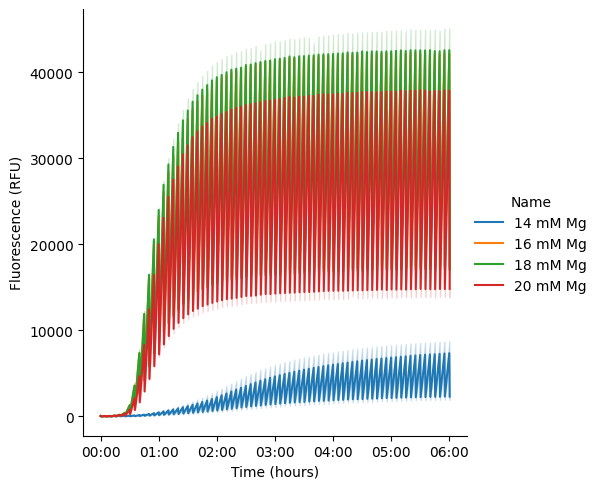

In [7]:
pr.plot_curves(data);

## Steady state
Bar graph of steady-state endpoint of each sample. Steady state is calculated as the maximum fluorescence value over a 3-sample rolling average on the data.

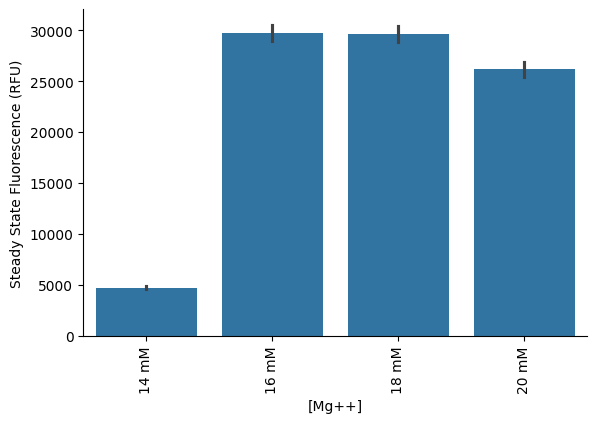

In [16]:
#| label: fig:endpoint-exp4

replace_dict = {'14 mM Mg':'14 mM',
                '16 mM Mg':'16 mM',
                '18 mM Mg':'18 mM',
                '20 mM Mg':'20 mM',
               }

data['Name'] = data['Name'].replace(replace_dict)

p = pr.plot_steadystate(data,)
plt.xlabel('[Mg++]')
p.savefig("plot7")

# Kinetics Analysis
These functions calculate key kinetic parameters of the time series.

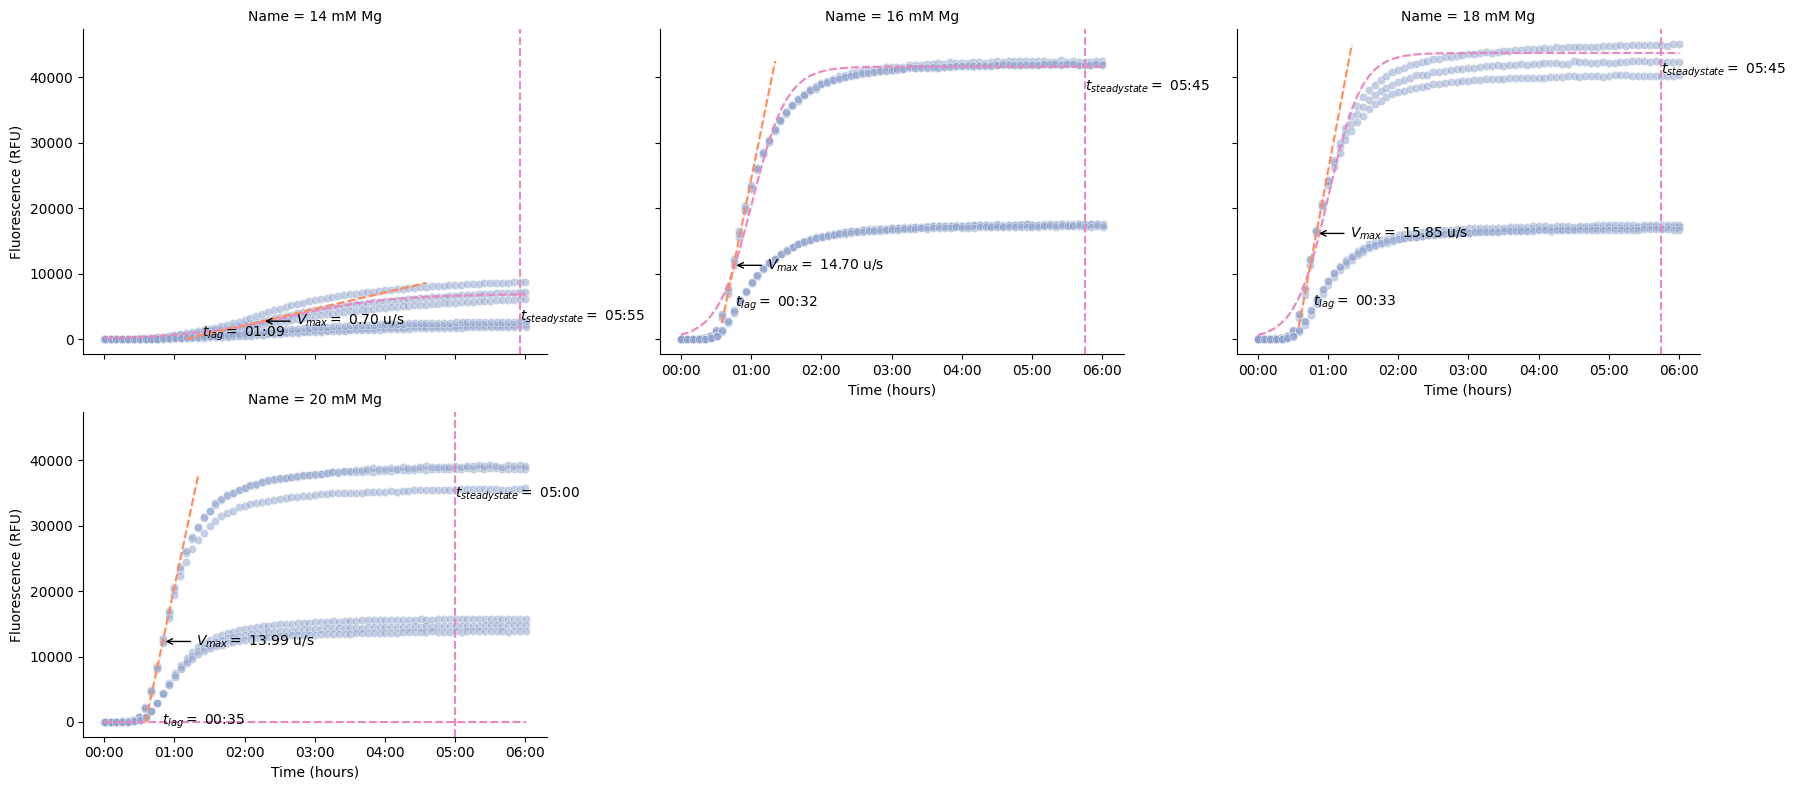

In [9]:
pr.plot_kinetics(data)

We can also calculate the kinetics and display the parameters as a table.

In [10]:
pr.kinetic_analysis(data)

Velocity               \
                                    Time   Data   Max   
Well Name     Read                                      
I1   14 mM Mg GFP-F-G35  0 days 02:15:00   2744  0.70   
I4   14 mM Mg GFP-F-G35  0 days 02:25:00   2433  0.61   
I7   14 mM Mg GFP-F-G35  0 days 02:15:00   3828  0.98   
K1   16 mM Mg GFP-F-G35  0 days 00:45:00  11282 14.70   
K4   16 mM Mg GFP-F-G35  0 days 00:45:00  11818 14.84   
K7   16 mM Mg GFP-F-G35  0 days 00:45:00  12246 14.85   
M1   18 mM Mg GFP-F-G35  0 days 00:50:00  16157 15.85   
M4   18 mM Mg GFP-F-G35  0 days 00:45:00  12080 15.24   
M7   18 mM Mg GFP-F-G35  0 days 00:45:00  12256 14.90   
O1   20 mM Mg GFP-F-G35  0 days 00:50:00  12303 13.99   
O4   20 mM Mg GFP-F-G35  0 days 00:50:00  12852 14.08   
O7   20 mM Mg GFP-F-G35  0 days 00:50:00  12101 12.96   
I1   14 mM Mg GFP-M-G100 0 days 02:25:23    986  0.27   
I4   14 mM Mg GFP-M-G100 0 days 02:20:23    712  0.21   
I7   14 mM Mg GFP-M-G100 0 days 02:35:23   1500  0.35   
K1   16 mM Mg GFP-M-G100 0 days 00:50:23   5674  5.53   
K4   16 mM Mg GFP-M-G100 0 days 00:50:23   5815  5.50   
K7   16 mM Mg GFP-M-G100 0 days 00:45:23   4393  5.35   
M1   18 mM Mg GFP-M-G100 0 days 00:50:23   5364  5.57   
M4   18 mM Mg GFP-M-G100 0 days 00:50:23   5999  5.73   
M7   18 mM Mg GFP-M-G100 0 days 00:50:23   6122  5.48   
O1   20 mM Mg GFP-M-G100 0 days 00:50:23   4475  5.16   
O4   20 mM Mg GFP-M-G100 0 days 00:55:23   5861  5.03   
O7   20 mM Mg GFP-M-G100 0 days 00:55:23   5665  4.75   

                                               Lag            Steady State  \
                                              Time    Data            Time   
Well Name     Read                                                           
I1   14 mM Mg GFP-F-G35  0 days 01:09:21.244019139  805.23 0 days 05:55:00   
I4   14 mM Mg GFP-F-G35  0 days 01:18:31.475409836  730.85 0 days 05:45:00   
I7   14 mM Mg GFP-F-G35  0 days 01:09:53.877551020 1016.50 0 days 05:45:00   
K1   16 mM Mg GFP-F-G35  0 days 00:32:12.517006803 5335.04 0 days 05:45:00   
K4   16 mM Mg GFP-F-G35  0 days 00:31:43.459896652 5312.84 0 days 05:25:00   
K7   16 mM Mg GFP-F-G35  0 days 00:31:15.168387966    0.00 0 days 05:00:00   
M1   18 mM Mg GFP-F-G35  0 days 00:33:00.630914826 5593.24 0 days 05:45:00   
M4   18 mM Mg GFP-F-G35  0 days 00:31:47.175672719 5181.14 0 days 05:05:00   
M7   18 mM Mg GFP-F-G35  0 days 00:31:17.633639007 4758.06 0 days 03:55:00   
O1   20 mM Mg GFP-F-G35  0 days 00:35:20.586132952    0.00 0 days 05:00:00   
O4   20 mM Mg GFP-F-G35  0 days 00:34:47.431952663 4778.50 0 days 05:15:00   
O7   20 mM Mg GFP-F-G35  0 days 00:34:26.280864198    0.00 0 days 05:00:00   
I1   14 mM Mg GFP-M-G100 0 days 01:24:31.148148148  329.92 0 days 05:40:23   
I4   14 mM Mg GFP-M-G100    0 days 01:24:45.500000  254.78 0 days 05:35:23   
I7   14 mM Mg GFP-M-G100 0 days 01:23:16.076923077  419.53 0 days 05:55:23   
K1   16 mM Mg GFP-M-G100 0 days 00:33:16.960216998 2067.55 0 days 03:50:23   
K4   16 mM Mg GFP-M-G100 0 days 00:32:45.727272727 2212.41 0 days 05:55:23   
K7   16 mM Mg GFP-M-G100 0 days 00:31:41.878504673 2090.98 0 days 05:20:23   
M1   18 mM Mg GFP-M-G100 0 days 00:34:19.407185629 2126.31 0 days 05:20:23   
M4   18 mM Mg GFP-M-G100 0 days 00:32:55.444703143 2025.78 0 days 03:50:23   
M7   18 mM Mg GFP-M-G100 0 days 00:31:45.166768107 1918.59 0 days 03:55:23   
O1   20 mM Mg GFP-M-G100 0 days 00:35:56.311814074 1897.37 0 days 05:25:23   
O4   20 mM Mg GFP-M-G100 0 days 00:35:57.791252485 1865.38 0 days 06:00:23   
O7   20 mM Mg GFP-M-G100 0 days 00:35:31.204768583 1623.32 0 days 04:05:23   

                                     Fit               
                           Data        L    k      x0  
Well Name     Read                                     
I1   14 mM Mg GFP-F-G35    7147  6897.89 0.00 9425.31  
I4   14 mM Mg GFP-F-G35    5984  5836.42 0.00 9868.93  
I7   14 mM Mg GFP-F-G35    8629  8336.01 0.00 8704.02  
K1   16 mM Mg GFP-F-G35   42421 41658.93 0.00 363